<a href="https://colab.research.google.com/github/agu3ro/Pytorch-DL/blob/main/CNN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
train_data = datasets.FashionMNIST(root='/cnn_fashion_mnist', download=True, train=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='/cnn_fashion_mnist', download=True, train=False, transform=transforms.ToTensor())

In [29]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In [30]:
# conv1 pool2d conv2 pool2d
# (((28-2)/2)-2)/2
# 16 5 5 cause x.shape is [1,16,5,5]

In [31]:
class FashionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(1,6,3,1)
    self.conv2 = torch.nn.Conv2d(6,16,3,1)
    self.fc1 = torch.nn.Linear(16*5*5,120)
    self.fc2 = torch.nn.Linear(120,84)
    self.fc3 = torch.nn.Linear(84,10)

  def forward(self,x):
    x = torch.nn.functional.relu(self.conv1(x))
    x = torch.nn.functional.max_pool2d(x,2,2)
    x = torch.nn.functional.relu(self.conv2(x))
    x = torch.nn.functional.max_pool2d(x,2,2)
    x = x.view(-1,16*5*5)
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return torch.nn.functional.log_softmax(x, dim=1)

In [32]:
model = FashionModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

In [33]:
import time
time_start = time.time()

train_correct = []
test_correct = []
for i in range(5):
  trn_corr = 0
  tst_corr = 0
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted==y_train).sum()
    trn_corr += batch_corr
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b%600==0:
      print(f"epoch: {i}, batch: {b}, loss: {loss}")
  train_correct.append(trn_corr)
  train_losses.append(loss)

end_time = time.time()
est_time = end_time - time_start
print(f"This whole thing took colab {est_time/60} minutes to process.")

epoch: 0, batch: 600, loss: 0.8523171544075012
epoch: 0, batch: 1200, loss: 0.213828444480896
epoch: 0, batch: 1800, loss: 0.7580426335334778
epoch: 0, batch: 2400, loss: 0.5885034799575806
epoch: 0, batch: 3000, loss: 0.31034502387046814
epoch: 0, batch: 3600, loss: 0.5360387563705444
epoch: 0, batch: 4200, loss: 0.41719111800193787
epoch: 0, batch: 4800, loss: 0.1717531383037567
epoch: 0, batch: 5400, loss: 0.7794926166534424
epoch: 0, batch: 6000, loss: 0.32713475823402405
epoch: 1, batch: 600, loss: 0.5158043503761292
epoch: 1, batch: 1200, loss: 0.3489619493484497
epoch: 1, batch: 1800, loss: 0.16423971951007843
epoch: 1, batch: 2400, loss: 0.24665434658527374
epoch: 1, batch: 3000, loss: 0.51242595911026
epoch: 1, batch: 3600, loss: 0.2904837727546692
epoch: 1, batch: 4200, loss: 0.3466109037399292
epoch: 1, batch: 4800, loss: 0.06422334909439087
epoch: 1, batch: 5400, loss: 0.2891441583633423
epoch: 1, batch: 6000, loss: 0.2614697813987732
epoch: 2, batch: 600, loss: 0.143551006

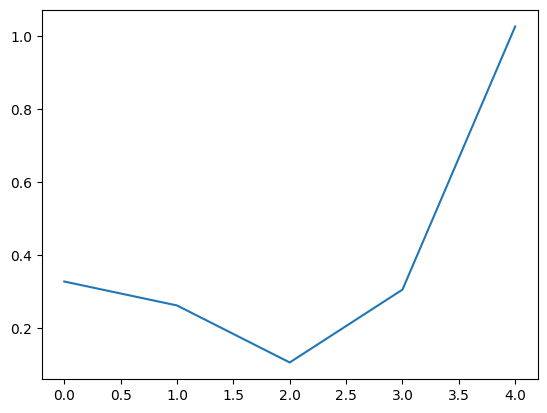

In [34]:
plt.plot([tl.item() for tl in train_losses])

In [35]:
test_correct = []
test_losses = []
for i in range(5):
  trn_corr = 0
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      loss = criterion(y_val, y_test)
      predicted = torch.max(y_val.data, 1)[1]
      trn_corr += (predicted==y_test).sum()
  test_correct.append(trn_corr)
  test_losses.append(loss)

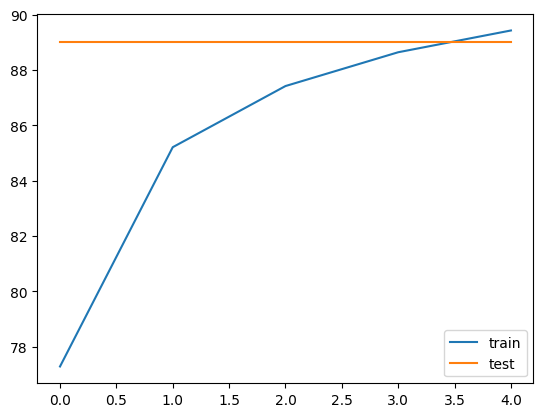

In [39]:
plt.plot([(tl/600).item() for tl in train_correct], label='train')
plt.plot([(tl/100).item() for tl in test_correct], label='test')
plt.legend()

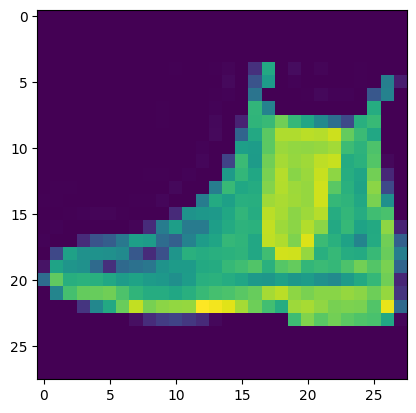

In [42]:
plt.imshow(test_data[1488][0].reshape(28,28))

In [45]:
with torch.no_grad():
  guess = model(test_data[1488][0].view(1,1,28,28))
  print(torch.max(guess,1)[1])

tensor([9])


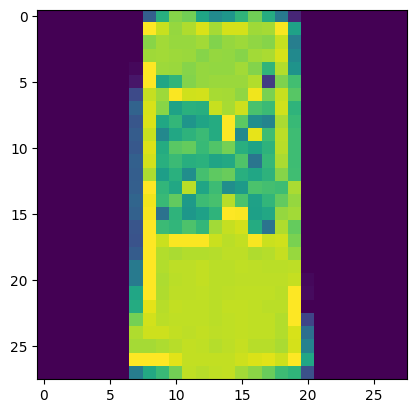

In [51]:
plt.imshow(test_data[4275][0].reshape(28,28))

In [52]:
with torch.no_grad():
  whatisthis = model(test_data[4275][0].view(1,1,28,28))
  print(f"guess: {torch.max(whatisthis, 1)[1].item()}, actual: {test_data[4275][1]}")

guess: 0, actual: 0


In [ ]:
test_data[4275][1]